# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 1 | gat
Processing Record 3 of Set 1 | laguna
Processing Record 4 of Set 1 | zemio
Processing Record 5 of Set 1 | redmond
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | kaitangata
Processing Record 8 of Set 1 | alofi
Processing Record 9 of Set 1 | dingzhou
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | meulaboh
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | bazarnyy karabulak
Processing Record 16 of Set 1 | makakilo city
Processing Record 17 of Set 1 | neuquen
Processing Record 18 of Set 1 | cabo san lucas
Processing Record 19 of Set 1 | sarakhs
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | ponta do sol
Processing Record 22 of Set 1 | canon city
Proc

Processing Record 39 of Set 4 | kincardine
Processing Record 40 of Set 4 | faxinal
Processing Record 41 of Set 4 | jacareacanga
Processing Record 42 of Set 4 | atambua
Processing Record 43 of Set 4 | sofiysk
City not found. Skipping...
Processing Record 44 of Set 4 | sangar
Processing Record 45 of Set 4 | faanui
Processing Record 46 of Set 4 | zottegem
Processing Record 47 of Set 4 | alpena
Processing Record 48 of Set 4 | half moon bay
Processing Record 49 of Set 4 | anupgarh
Processing Record 0 of Set 5 | georgetown
Processing Record 1 of Set 5 | bamiantong
Processing Record 2 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 5 | saint george
Processing Record 4 of Set 5 | avera
Processing Record 5 of Set 5 | havoysund
Processing Record 6 of Set 5 | ust-omchug
Processing Record 7 of Set 5 | wahran
City not found. Skipping...
Processing Record 8 of Set 5 | burica
City not found. Skipping...
Processing Record 9 of Set 5 | batagay-alyta
Processing Record 

Processing Record 26 of Set 8 | sorvag
City not found. Skipping...
Processing Record 27 of Set 8 | buzovna
Processing Record 28 of Set 8 | york
Processing Record 29 of Set 8 | kushiro
Processing Record 30 of Set 8 | polson
Processing Record 31 of Set 8 | lata
Processing Record 32 of Set 8 | kibre mengist
Processing Record 33 of Set 8 | north bend
Processing Record 34 of Set 8 | kilosa
Processing Record 35 of Set 8 | cortez
Processing Record 36 of Set 8 | bauchi
Processing Record 37 of Set 8 | rumphi
Processing Record 38 of Set 8 | mwingi
Processing Record 39 of Set 8 | boyolangu
Processing Record 40 of Set 8 | kopanskaya
Processing Record 41 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 42 of Set 8 | balykshi
Processing Record 43 of Set 8 | sinnamary
Processing Record 44 of Set 8 | borsad
Processing Record 45 of Set 8 | newton
Processing Record 46 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 47 of Set 8 | vavozh
Processing Record 48 of Set 8

Processing Record 17 of Set 12 | babanusah
City not found. Skipping...
Processing Record 18 of Set 12 | sjovegan
Processing Record 19 of Set 12 | antibes
Processing Record 20 of Set 12 | alyangula
Processing Record 21 of Set 12 | trimbak
Processing Record 22 of Set 12 | vadso
Processing Record 23 of Set 12 | bayeux
Processing Record 24 of Set 12 | preston
Processing Record 25 of Set 12 | kahului
Processing Record 26 of Set 12 | sao gabriel da cachoeira
Processing Record 27 of Set 12 | santa isabel do rio negro
Processing Record 28 of Set 12 | springbok
Processing Record 29 of Set 12 | elko
Processing Record 30 of Set 12 | susehri
Processing Record 31 of Set 12 | saint-marc-des-carrieres
Processing Record 32 of Set 12 | warrnambool
Processing Record 33 of Set 12 | tianpeng
Processing Record 34 of Set 12 | havre-saint-pierre
Processing Record 35 of Set 12 | xuddur
Processing Record 36 of Set 12 | concepcion
Processing Record 37 of Set 12 | plettenberg bay
Processing Record 38 of Set 12 |

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gat,31.6100,34.7642,15.22,53,0,1.92,IL,1680489669
1,laguna,38.4210,-121.4238,14.11,68,75,5.66,US,1680489479
2,zemio,5.0314,25.1361,23.44,66,69,0.53,CF,1680489669
3,redmond,47.6740,-122.1215,5.96,87,100,0.89,US,1680489670
4,ushuaia,-54.8000,-68.3000,12.81,38,20,5.66,AR,1680489670


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gat,31.6100,34.7642,15.22,53,0,1.92,IL,1680489669
1,laguna,38.4210,-121.4238,14.11,68,75,5.66,US,1680489479
2,zemio,5.0314,25.1361,23.44,66,69,0.53,CF,1680489669
3,redmond,47.6740,-122.1215,5.96,87,100,0.89,US,1680489670
4,ushuaia,-54.8000,-68.3000,12.81,38,20,5.66,AR,1680489670


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

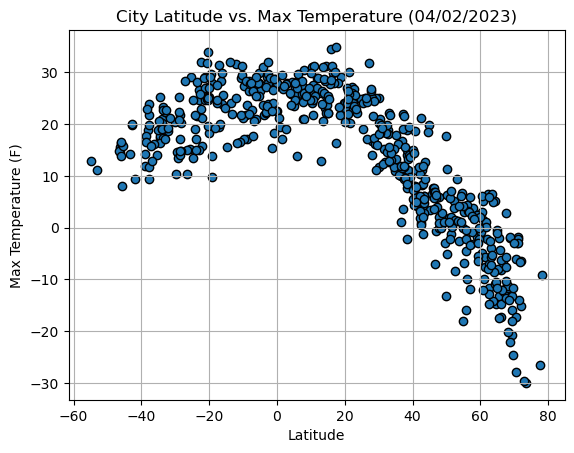

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (04/02/2023)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

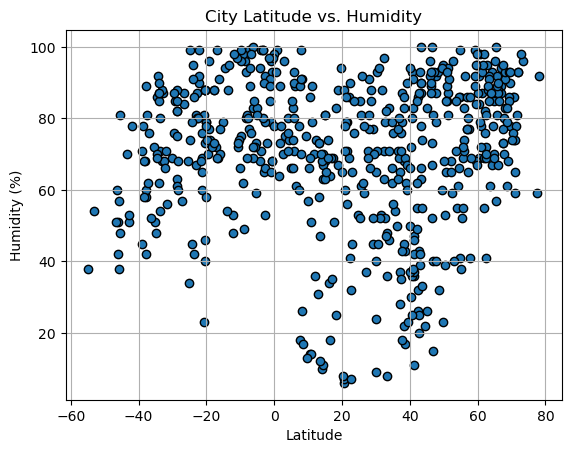

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

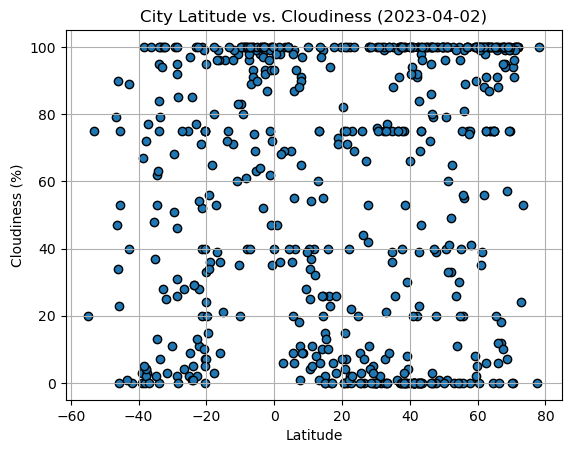

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", linewidths=1, marker="o", label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime('%Y-%m-%d'))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

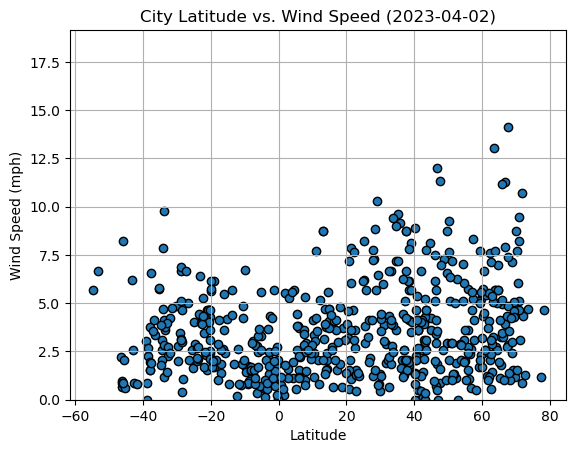

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime('%Y-%m-%d'))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0, city_data_df["Wind Speed"].max()+5)
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue}")
    plt.show()
    
    return line_eq

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gat,31.6100,34.7642,15.22,53,0,1.92,IL,1680489669
1,laguna,38.4210,-121.4238,14.11,68,75,5.66,US,1680489479
2,zemio,5.0314,25.1361,23.44,66,69,0.53,CF,1680489669
3,redmond,47.6740,-122.1215,5.96,87,100,0.89,US,1680489670
7,dingzhou,38.5131,114.9956,11.06,43,100,4.14,CN,1680489671


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,ushuaia,-54.8000,-68.3000,12.81,38,20,5.66,AR,1680489670
5,kaitangata,-46.2817,169.8464,15.52,60,47,0.64,NZ,1680489671
6,alofi,-19.0595,-169.9187,27.94,74,36,6.17,NU,1680489671
8,bredasdorp,-34.5322,20.0403,17.35,86,62,3.07,ZA,1680489671
12,rikitea,-23.1203,-134.9692,26.64,81,77,6.40,PF,1680489673


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.9056544249179089


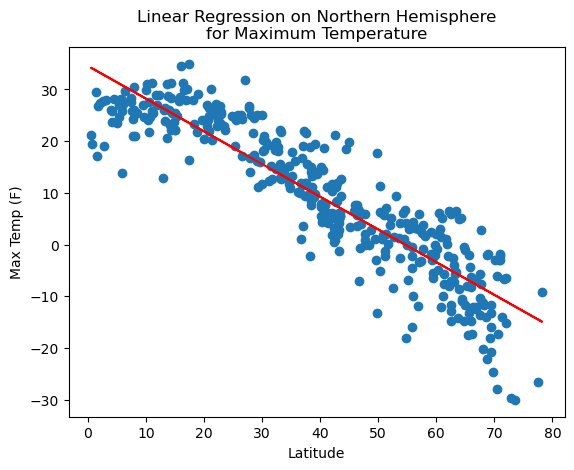

'y = -0.63x + 34.55'

In [15]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                       "Linear Regression on Northern Hemisphere\nfor Maximum Temperature", 
                       "Max Temp (F)", (10,40))

The r-value is: 0.6003909695441528


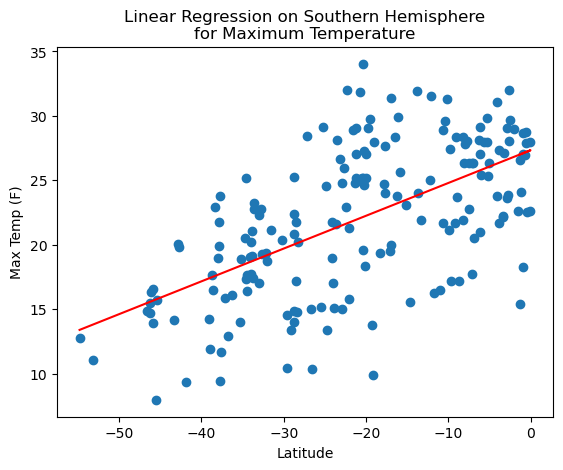

'y = 0.25x + 27.34'

In [16]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Linear Regression on Southern Hemisphere\nfor Maximum Temperature", 
                       "Max Temp (F)", (-50,80))

**Discussion about the linear relationship:** Based on the calculated r-values, there is a strong negative linear relationship between latitude and maximum temperature in the northern hemisphere, with an r-value of -0.91. This means that as latitude increases, maximum temperature decreases. On the other hand, there is a moderate positive linear relationship between latitude and maximum temperature in the southern hemisphere, with an r-value of 0.60. This means that as latitude increases, maximum temperature also increases. Overall, these relationships suggest that temperature is strongly influenced by latitude, with higher latitudes generally experiencing cooler temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.25888365918346734


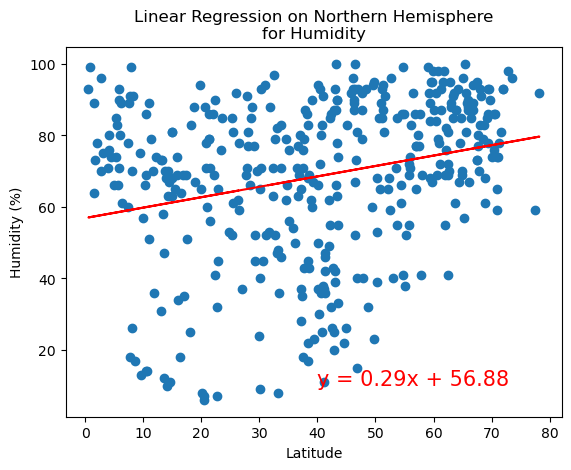

'y = 0.29x + 56.88'

In [17]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Linear Regression on Northern Hemisphere\nfor Humidity", 
                       "Humidity (%)", (40,10))

The r-value is: 0.4174993553885557


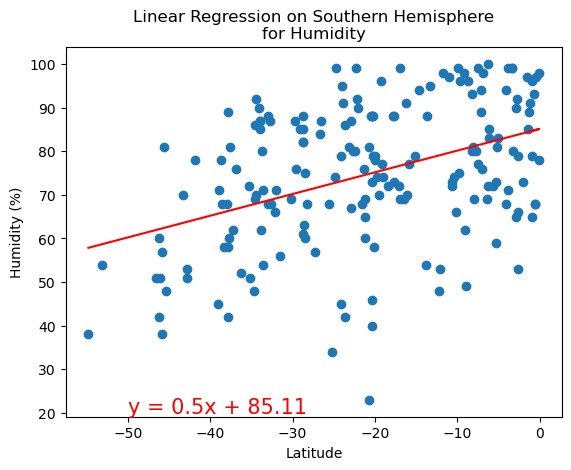

'y = 0.5x + 85.11'

In [18]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Linear Regression on Southern Hemisphere\nfor Humidity", 
                       "Humidity (%)", (-50,20))

**Discussion about the linear relationship:** The linear regression analysis shows a weak positive correlation between latitude and humidity in both the Northern and Southern Hemispheres. The r-values are 0.26 for the Northern Hemisphere and 0.42 for the Southern Hemisphere. The regression lines suggest that humidity tends to increase slightly as we move towards the equator in both hemispheres. However, there is a lot of variation in humidity levels at any given latitude, and the regression lines do not fit the data very well. Other factors such as proximity to bodies of water and prevailing winds may have a stronger influence on humidity levels. Overall, while the linear regression analysis provides some insight, it is important to consider other factors as well when analyzing the relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2556537431187556


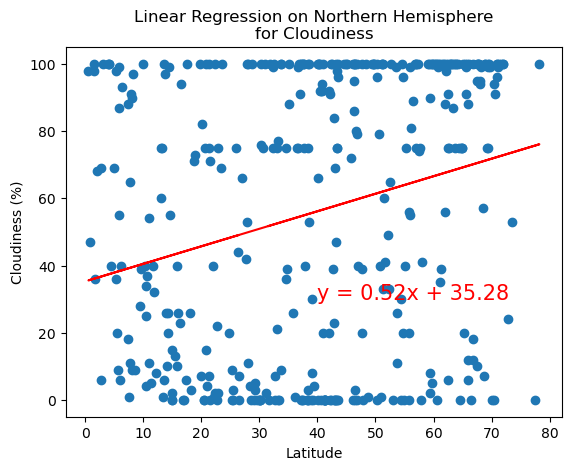

'y = 0.52x + 35.28'

In [19]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Linear Regression on Northern Hemisphere\nfor Cloudiness",
                       "Cloudiness (%)", (40,30))

The r-value is: 0.42301754746908143


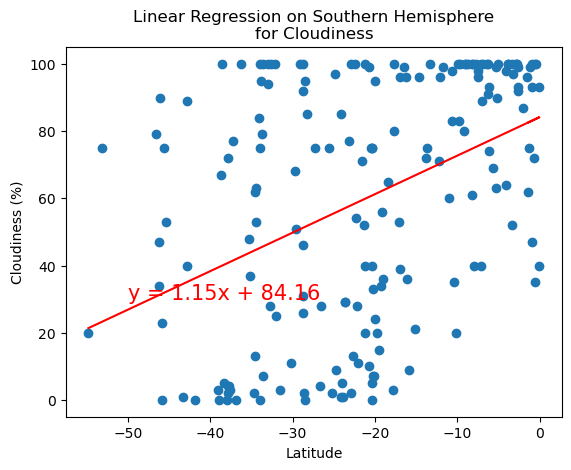

'y = 1.15x + 84.16'

In [20]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Linear Regression on Southern Hemisphere\nfor Cloudiness",
                       "Cloudiness (%)", (-50,30))

**Discussion about the linear relationship:** For both the Northern and Southern hemispheres, there seems to be a weak positive correlation between cloudiness and latitude. The regression lines indicate that as we move towards higher latitudes, cloudiness tends to slightly increase. However, the correlation coefficients are relatively low, suggesting that there may not be a strong relationship between cloudiness and latitude. Additionally, there seems to be a significant amount of variability in cloudiness at any given latitude, which may be due to factors such as local weather patterns and geography. Overall, while there may be a slight trend in cloudiness with respect to latitude, other variables likely play a more significant role in determining cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.17200412023512465


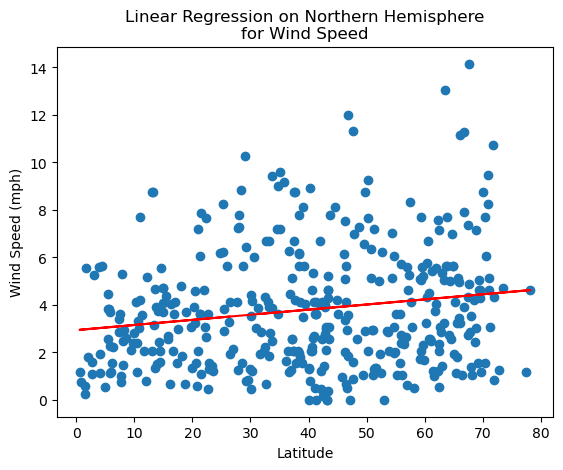

'y = 0.02x + 2.94'

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Linear Regression on Northern Hemisphere\nfor Wind Speed",
                       "Wind Speed (mph)", (40,20))

The r-value is: -0.2624214824765583


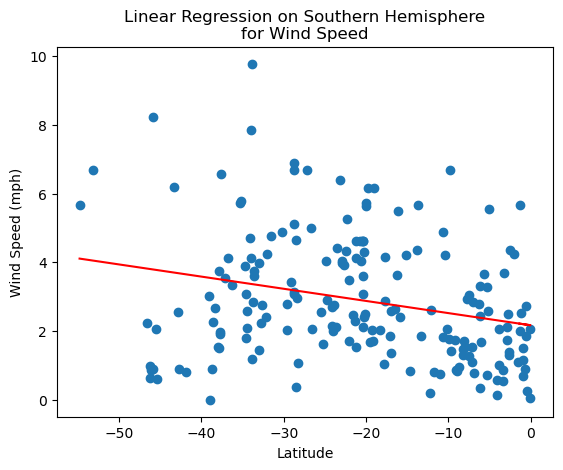

'y = -0.04x + 2.17'

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Linear Regression on Southern Hemisphere\nfor Wind Speed",
                       "Wind Speed (mph)", (-50,20))

**Discussion about the linear relationship:** For Wind Speed vs. Latitude plot, there seems to be no strong correlation between the two variables in either hemisphere, as the r-values are low. However, in the Northern Hemisphere, we can see a slight positive trend in the data, indicating that wind speed may increase slightly as we move towards higher latitudes. Meanwhile, in the Southern Hemisphere, there is a slight negative trend, indicating that wind speed may decrease slightly as we move towards lower latitudes. However, it's important to note that the strength of these trends is weak, and other factors may have a more significant impact on wind speed in different regions.